Recurral Neural Network

Data Generation and Preparation: We create a synthetic sine wave with noise, which mimics real-world time series data. The target for each input is the next value in the series.

Model Architecture: A simple RNN with 50 units to capture time dependencies, followed by a dense layer to output the predicted next value.

Training and Validation: Training is conducted with validation on a separate set to monitor performance and avoid over-learning on the training data.

Visualization of Predictions: After training, we plot the model's predictions against the actual data to visually assess how well the model has learned to predict future time steps.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError

In [2]:
# Generate synthetic sine wave data
t = np.arange(0, 1000)
data = np.sin(0.02 * t) + np.random.rand(1000) * 0.5
target = np.roll(data, -1)

In [3]:
# Prepare data for RNN
data = data.reshape(-1, 1, 1)  # Reshape data to (samples, time steps, features)
target = target.reshape(-1, 1)  # Reshape target to (samples, features)

In [4]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
X_train, X_test = data[:train_size], data[train_size:]
Y_train, Y_test = target[:train_size], target[train_size:]

In [13]:
# Build RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(1, 1)),  # RNN layer with 50 units
    Dense(1)  # Output layer predicts the next value
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, epochs=50, batch_size=20, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.4220 - mean_absolute_error: 0.5622 - val_loss: 0.1573 - val_mean_absolute_error: 0.3402
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1030 - mean_absolute_error: 0.2603 - val_loss: 0.0617 - val_mean_absolute_error: 0.1975
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0443 - mean_absolute_error: 0.1721 - val_loss: 0.0411 - val_mean_absolute_error: 0.1566
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 - mean_absolute_error: 0.1631 - val_loss: 0.0409 - val_mean_absolute_error: 0.1563
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - mean_absolute_error: 0.1600 - val_loss: 0.0408 - val_mean_absolute_error: 0.1560
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0390 - mean_absolute_error: 0.1622 - val_loss: 0.0408 - val_mean_absolute_error: 0.1563
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0402 - mean_absolute_error: 0.1651 - val_loss: 0.04

In [14]:
# Optionally print additional metrics
print(f"Final Validation MAE: {history.history['val_mean_absolute_error'][-1]:.2f}")

Final Validation MAE: 0.16


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


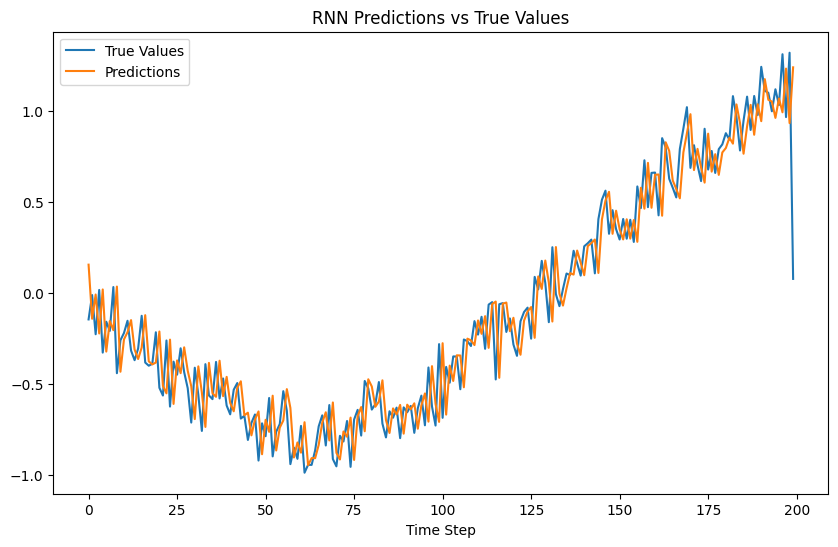

In [10]:
# Prediction and visualization
predictions = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('RNN Predictions vs True Values')
plt.xlabel('Time Step')
plt.legend()
plt.show()